In [57]:
### Load needed modules
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [58]:
# parameters 

g = 9.8 # gravity m/s**2
m_s = 50 # kg mass of rocket shell
ro_air = 1.091  # kg/m**3 denisty of air ***constant at all throughout flight
A = 3.14*.5**2 # m**2 cross sectional area of rocket
v_e = 325 # m/s exhaust speed
C_D = 0.15 # drag coeffiecnt 
m_p0 = 100 #kg mass of propellent at t = 0  
mass_flow_p = 20 #kg/s 
dt = .1 #s time step for euler's method
T = 100.0 
N = int(T/dt)+1
t = numpy.linspace(0.0,T,N) # time linearization

In [59]:
#Intial conditions 

v0 = 0 # intial velocity 
t0 = 0 # intial time
z0 = 0 # intial altitude 
u = numpy.array([z0,v0])
z = numpy.zeros(N)
v = numpy.zeros(N)
ttt = numpy.zeros(N)
z[0] = z0

In [60]:
# define functions for mass propellent and mass flow rate of propellent

def m_p(t):

    """
    Parameters
    -------------

    t : float
        given time

    Returns
    -------------

    mp : float 
        total mass of mass propelent at time t 

    """

    if t<=5:
        m_p = 100-20*t
    else: 
        m_p = 0 
    
    return m_p 


def mfr(t):

    """
    
    Parameters
    ----------
    
    t  : float
        given time 
    
    Returns
    ----------
    
    mfr : float
        mass flow rate at time t
    """
    
    if t<= 5:
        mfr = 20
    else: 
        mfr = 0
    return     mfr 


In [61]:
#### Euler Method 
tt = 0
for n in range(1,N):
    u = u + dt*numpy.array([u[1],-g + (mfr(tt)*v_e - .5*ro_air*u[1]*numpy.abs(u[1])*A*C_D)/(m_s+m_p(tt)) ])
    z[n] = u[0]
    v[n] = u[1]
    ttt[n] = tt
    tt = tt+dt
    if z[n] < 0: 
        break 

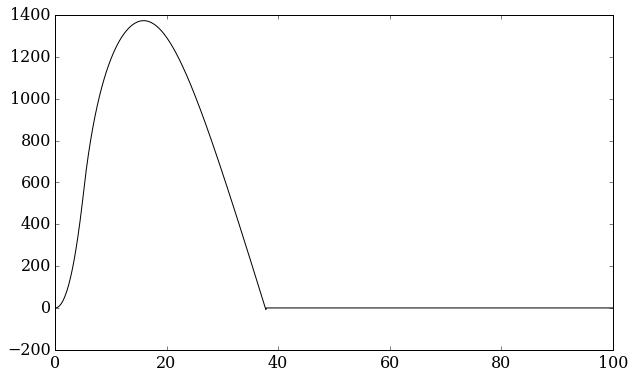

In [62]:
pyplot.figure(figsize=(10,6))
pyplot.plot(t,z, 'k-');

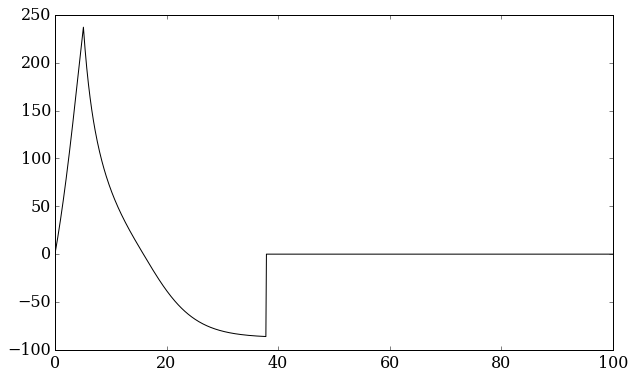

In [63]:
pyplot.figure(figsize=(10,6))
pyplot.plot(t,v, 'k-');

In [64]:
A = numpy.array([ttt,z,v])


In [87]:
numpy.amax(A,1)

array([   37.7       ,  1372.9140887 ,   237.25531049])

In [74]:
numpy.argmax(A,1)

array([378, 159,  51])

In [90]:
A[2,378]

-86.132718361096323

In [89]:
A[0,378]

37.700000000000266